Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---


# Model Interpretation 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make a Shapley force plot to explain at least 1 individual prediction.
- [ ] Share at least 1 visualization (of any type) on Slack.

But, if you aren't ready to make a Shapley force plot with your own dataset today, that's okay. You can practice this objective with another dataset instead (any dataset you've worked with previously). An example solution will be provided for the Titanic dataset, which is in the data directory of this repository.

**Multi-class classification** will result in multiple sets of Shapley Values (one for each class).


## Stretch Goals
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!


## Links
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

#***Upload Data***

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
upload = files.upload()

Saving states_all_extended.csv to states_all_extended.csv


In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('states_all_extended.csv')

#***Data Exploration***

In [0]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,GRADES_PK_AM,GRADES_KG_AM,GRADES_4_AM,GRADES_8_AM,GRADES_12_AM,GRADES_1_8_AM,GRADES_9_12_AM,GRADES_ALL_AM,GRADES_PK_AS,GRADES_KG_AS,GRADES_4_AS,GRADES_8_AS,GRADES_12_AS,GRADES_1_8_AS,GRADES_9_12_AS,GRADES_ALL_AS,GRADES_PK_HI,GRADES_KG_HI,GRADES_4_HI,...,GRADES_12_WHF,GRADES_1_8_WHF,GRADES_9_12_WHF,GRADES_ALL_WHF,GRADES_PK_HPM,GRADES_KG_HPM,GRADES_4_HPM,GRADES_8_HPM,GRADES_12_HPM,GRADES_1_8_HPM,GRADES_9_12_HPM,GRADES_ALL_HPM,GRADES_PK_HPF,GRADES_KG_HPF,GRADES_4_HPF,GRADES_8_HPF,GRADES_12_HPF,GRADES_1_8_HPF,GRADES_9_12_HPF,GRADES_ALL_HPF,GRADES_PK_TRM,GRADES_KG_TRM,GRADES_4_TRM,GRADES_8_TRM,GRADES_12_TRM,GRADES_1_8_TRM,GRADES_9_12_TRM,GRADES_ALL_TRM,GRADES_PK_TRF,GRADES_KG_TRF,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,NaN,172.0,460.0,625.0,446.0,3930.0,2069.0,NaN,NaN,307.0,346.0,306.0,249.0,2651.0,1156.0,NaN,NaN,220.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,1457.0,2624.0,2175.0,1853.0,1323.0,17664.0,6391.0,25512.0,55.0,395.0,389.0,367.0,324.0,3090.0,1350.0,4495.0,26.0,229.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,250.0,3674.0,3946.0,3230.0,2234.0,30133.0,10686.0,41069.0,20.0,754.0,822.0,734.0,823.0,6446.0,3340.0,9806.0,718.0,15501.0,14877.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,2.0,84.0,84.0,146.0,67.0,828.0,382.0,1212.0,7.0,199.0,214.0,216.0,224.0,1792.0,902.0,2701.0,11.0,370.0,278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,NaN,2954.0,3079.0,2912.0,2434.0,24697.0,12820.0,NaN,NaN,41763.0,46079.0,40852.0,39036.0,356001.0,169604.0,NaN,NaN,170998.0,152087.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [0]:
df.shape

(1492, 193)

In [0]:
df.isnull().sum()

PRIMARY_KEY               0
STATE                     0
YEAR                      0
ENROLL                  263
TOTAL_REVENUE           212
                       ... 
GRADES_ALL_TRF         1166
AVG_MATH_4_SCORE        956
AVG_MATH_8_SCORE        960
AVG_READING_4_SCORE     959
AVG_READING_8_SCORE     994
Length: 193, dtype: int64

In [0]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,GRADES_PK_AM,GRADES_KG_AM,GRADES_4_AM,GRADES_8_AM,GRADES_12_AM,GRADES_1_8_AM,GRADES_9_12_AM,GRADES_ALL_AM,GRADES_PK_AS,GRADES_KG_AS,GRADES_4_AS,GRADES_8_AS,GRADES_12_AS,GRADES_1_8_AS,GRADES_9_12_AS,GRADES_ALL_AS,GRADES_PK_HI,GRADES_KG_HI,GRADES_4_HI,GRADES_8_HI,GRADES_12_HI,...,GRADES_12_WHF,GRADES_1_8_WHF,GRADES_9_12_WHF,GRADES_ALL_WHF,GRADES_PK_HPM,GRADES_KG_HPM,GRADES_4_HPM,GRADES_8_HPM,GRADES_12_HPM,GRADES_1_8_HPM,GRADES_9_12_HPM,GRADES_ALL_HPM,GRADES_PK_HPF,GRADES_KG_HPF,GRADES_4_HPF,GRADES_8_HPF,GRADES_12_HPF,GRADES_1_8_HPF,GRADES_9_12_HPF,GRADES_ALL_HPF,GRADES_PK_TRM,GRADES_KG_TRM,GRADES_4_TRM,GRADES_8_TRM,GRADES_12_TRM,GRADES_1_8_TRM,GRADES_9_12_TRM,GRADES_ALL_TRM,GRADES_PK_TRF,GRADES_KG_TRF,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,1.280000e+03,1319.000000,1360.000000,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,1213.000000,1316.000000,1317.000000,1317.000000,1317.000000,1313.000000,1317.000000,1206.000000,1214.000000,1314.000000,1313.000000,1314.000000,1313.000000,1309.000000,1313.000000,1207.000000,1217.000000,1315.000000,1315.000000,1315.000000,1315.000000,...,385.000000,385.000000,385.000000,365.000000,323.000000,340.000000,341.000000,340.000000,341.000000,340.000000,341.000000,323.000000,323.000000,341.000000,340.000000,340.000000,341.000000,340.000000,341.000000,323.000000,326.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,326.000000,326.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,326.000000,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,9.027693e+05,17601.614102,63746.761029,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,225.979390,760.743921,767.538345,777.394077,614.716021,6222.985529,2917.787396,8862.274461,530.933278,2756.047945,2906.130998,2845.964231,2731.290937,23162.644003,11653.024372,25612.210439,4421.936730,14364.869962,13493.914829,12404.343726,9132.282129,...,17072.597403,132917.844156,69951.527273,201684.600000,32.597523,149.973529,148.079179,141.529412,121.284457,1181.873529,559.909091,1501.204334,24.746130,139.419355,140.047059,133.238235,116.920821,1110.176471,524.049853,1400.349845,397.923313,1351.644315,1057.889213,865.851312,666.311953,8409.574344,3136.565598,10346.450920,332.251534,1279.061224,1028.244898,858.005831,688.883382,8177.699708,3181.918367,10159.435583,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,1.327562e+06,30016.166447,80205.138143,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,707.571196,1329.080478,1345.884519,1364.363491,1104.786683,10907.733731,5098.054895,16145.048867,1024.192018,6629.571167,7160.335243,7282.459326,7272.461755,57184.769503,30296.409901,35919.264733,16858.395457,38398.739824,36332.717175,33834.126608,27127.297329,...,15689.799123,117661.209842,63760.631005,172438.860603,52.940893,366.579754,396.701454,368.083070,305.322796,3085.014082,1437.446820,4137.549724,37.345258,332.765714,364.877250,344.694117,295.326324,2842.444027,1333.603806,3781.140208,449.436341,1884.995246,1398.123025,1162.268743,1018.614903,11053.250858,4557.600744,10908.717017,402.966948,1758.863573,1342.500562,1137.723466,1010.942102,10627.763472,4529.779883,10692.45

All columns, except State and Primary Key, are numeric. This means that other than data cleaning, I can try all the columns since these are not high cardinality categorical columns. 

#***Choose your evaluation metric(s).***
![alt text](https://)
Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?

In [0]:
target_df = df[['PRIMARY_KEY','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE' ]].copy()
target_df.head()

,PRIMARY_KEY,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,208.398961,260.892247,196.764414,NaN


Using 8th grade reading and math scores for my target. Creating a classification class by grouping the scores into different categories. I think this will give more information then the numeric values.

####8TH GRADE READING

In [0]:
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].fillna(0)
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].astype(int)
target_df['AVG_READING_8_SCORE']

0         0
1       258
2       262
3       264
4         0
       ... 
1487    273
1488    267
1489    271
1490    258
1491    269
Name: AVG_READING_8_SCORE, Length: 1492, dtype: int64

In [0]:
target_df['AVG_READING_8_SCORE'].value_counts()

0      994
267     47
264     37
266     36
268     34
269     32
265     31
260     22
262     21
270     21
261     20
257     19
258     18
259     18
263     15
272     14
251     13
255     12
253     11
254     10
271      9
273      9
256      8
252      7
274      7
250      6
275      3
277      3
276      2
247      2
242      2
238      2
249      1
248      1
246      1
240      1
239      1
236      1
280      1
Name: AVG_READING_8_SCORE, dtype: int64

In [0]:
min(target_df['AVG_READING_8_SCORE']), max(target_df['AVG_READING_8_SCORE'])

(0, 280)

In [0]:
def proficiency(row):
  #separating basic into 3 groups (0-281)
    if 0< row['AVG_READING_8_SCORE'] < 260:
        val = '1'
    elif 260 <= row['AVG_READING_8_SCORE'] < 270:
        val = '2'
    elif 270 <= row['AVG_READING_8_SCORE'] < 281:
        val = '3'
    elif 281 <= row['AVG_READING_8_SCORE'] < 323:
        val = '4'
    elif row['AVG_READING_8_SCORE'] >= 323:
        val = '5'
    else:
        val = 0
    return val

target_df['READING_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['READING_PROF_8']

0       0
1       1
2       2
3       2
4       0
       ..
1487    3
1488    2
1489    3
1490    1
1491    2
Name: READING_PROF_8, Length: 1492, dtype: object

In [0]:
target_df['READING_PROF_8'].value_counts(normalize=True)

0    0.666220
2    0.197721
1    0.089812
3    0.046247
Name: READING_PROF_8, dtype: float64

####8TH GRADE MATH

In [0]:
min(target_df['AVG_MATH_8_SCORE']), max(target_df['AVG_MATH_8_SCORE'])

(232.831509532896, 300.568235011147)

In [0]:
target_df['AVG_MATH_8_SCORE'].value_counts()

253.595187    2
281.035488    1
292.321817    1
283.953345    1
270.415766    1
             ..
276.689980    1
268.432355    1
272.379907    1
267.863726    1
273.978787    1
Name: AVG_MATH_8_SCORE, Length: 531, dtype: int64

In [0]:
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].fillna(0)
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].astype(int)
target_df['AVG_MATH_8_SCORE']

0       252
1         0
2       265
3       256
4       260
       ... 
1487    290
1488    289
1489    273
1490    288
1491    288
Name: AVG_MATH_8_SCORE, Length: 1492, dtype: int64

In [0]:
def proficiency(row):
    if 0 < row['AVG_MATH_8_SCORE'] < 270:
        val = '1'
    elif 270 <= row['AVG_MATH_8_SCORE'] < 280:
        val = '2 '
    elif 280 <= row['AVG_MATH_8_SCORE'] < 299:
        val = '3'    
    elif 299 <= row['AVG_MATH_8_SCORE'] < 333:
        val = '4'
    elif row['AVG_MATH_8_SCORE'] >= 333:
        val = '5'
    else:
        val = 0
    return val

target_df['MATH_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['MATH_PROF_8'].astype('str')

0        1
1        0
2        1
3        1
4        1
        ..
1487     3
1488     3
1489    2 
1490     3
1491     3
Name: MATH_PROF_8, Length: 1492, dtype: object

In [0]:
target_df['MATH_PROF_8'].value_counts(normalize=True)

0     0.643432
3     0.184987
2     0.104558
1     0.066354
4     0.000670
Name: MATH_PROF_8, dtype: float64

#***Targets***

Adding the two new engineered features back into the database.

In [0]:
df[['READING_PROF_8', 'MATH_PROF_8']] = target_df[['READING_PROF_8','MATH_PROF_8' ]].copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,GRADES_PK_AM,GRADES_KG_AM,GRADES_4_AM,GRADES_8_AM,GRADES_12_AM,GRADES_1_8_AM,GRADES_9_12_AM,GRADES_ALL_AM,GRADES_PK_AS,GRADES_KG_AS,GRADES_4_AS,GRADES_8_AS,GRADES_12_AS,GRADES_1_8_AS,GRADES_9_12_AS,GRADES_ALL_AS,GRADES_PK_HI,GRADES_KG_HI,GRADES_4_HI,...,GRADES_9_12_WHF,GRADES_ALL_WHF,GRADES_PK_HPM,GRADES_KG_HPM,GRADES_4_HPM,GRADES_8_HPM,GRADES_12_HPM,GRADES_1_8_HPM,GRADES_9_12_HPM,GRADES_ALL_HPM,GRADES_PK_HPF,GRADES_KG_HPF,GRADES_4_HPF,GRADES_8_HPF,GRADES_12_HPF,GRADES_1_8_HPF,GRADES_9_12_HPF,GRADES_ALL_HPF,GRADES_PK_TRM,GRADES_KG_TRM,GRADES_4_TRM,GRADES_8_TRM,GRADES_12_TRM,GRADES_1_8_TRM,GRADES_9_12_TRM,GRADES_ALL_TRM,GRADES_PK_TRF,GRADES_KG_TRF,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,READING_PROF_8,MATH_PROF_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,NaN,172.0,460.0,625.0,446.0,3930.0,2069.0,NaN,NaN,307.0,346.0,306.0,249.0,2651.0,1156.0,NaN,NaN,220.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN,0,1
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,1457.0,2624.0,2175.0,1853.0,1323.0,17664.0,6391.0,25512.0,55.0,395.0,389.0,367.0,324.0,3090.0,1350.0,4495.0,26.0,229.0,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712,1,0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,250.0,3674.0,3946.0,3230.0,2234.0,30133.0,10686.0,41069.0,20.0,754.0,822.0,734.0,823.0,6446.0,3340.0,9806.0,718.0,15501.0,14877.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895,2,1
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,2.0,84.0,84.0,146.0,67.0,828.0,382.0,1212.0,7.0,199.0,214.0,216.0,224.0,1792.0,902.0,2701.0,11.0,370.0,278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665,2,1
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,NaN,2954.0,3079.0,2912.0,2434.0,24697.0,12820.0,NaN,NaN,41763.0,46079.0,40852.0,39036.0,356001.0,169604.0,NaN,NaN,170998.0,152087.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN,0,1


In [0]:
df.dtypes

PRIMARY_KEY             object
STATE                   object
YEAR                     int64
ENROLL                 float64
TOTAL_REVENUE          float64
                        ...   
AVG_MATH_8_SCORE       float64
AVG_READING_4_SCORE    float64
AVG_READING_8_SCORE    float64
READING_PROF_8          object
MATH_PROF_8             object
Length: 195, dtype: object

In [0]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

#***Choose which observations you will use to train, validate, and test your model.***

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train = df[df['YEAR'] <= 2011]
test = df[df['YEAR'] > 2011]
train.shape, test.shape

((1161, 195), (331, 195))

In [0]:
min(train['YEAR']), max(train['YEAR'])

(1992, 2011)

In [0]:
min(test['YEAR']), max(test['YEAR'])

(2012, 2017)

In [0]:
train, val = train_test_split(
    train, train_size=0.80, test_size=0.20,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((928, 195), (233, 195), (331, 195))

###***Begin to clean and explore your data.***

For this dataset, I would delete the years where the NAEP test scores are not available since that does not give anything for me to train/validate/test the data on. The data is from 1992 - 2017. The NAEP only gives information for the years 1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017.

In [0]:
df.isnull().sum()

PRIMARY_KEY              0
STATE                    0
YEAR                     0
ENROLL                 263
TOTAL_REVENUE          212
                      ... 
AVG_MATH_8_SCORE       960
AVG_READING_4_SCORE    959
AVG_READING_8_SCORE    994
READING_PROF_8           0
MATH_PROF_8              0
Length: 195, dtype: int64

In [0]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

In [0]:
train = df[df['YEAR'] <= 2011]
test = df[df['YEAR'] > 2011]
train.shape, test.shape

((1161, 195), (331, 195))

In [0]:
train, val = train_test_split(
    train, train_size=0.80, test_size=0.20,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((928, 195), (233, 195), (331, 195))

### ***Wrangle***

In [0]:
def wrangle(X):
  # Prevent SettingWithCopyWarning
  X = X.copy()

  #Dropping rows if they do not contain any score data, will not drop if there is just 1 value
  X = X.dropna(axis=0, subset=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], thresh=1)

  #Return the wrangled dataframe
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test) 

train.shape, val.shape, test.shape

((319, 195), (84, 195), (153, 195))

###***Baseline***

In [0]:
train['READING_PROF_8'].value_counts(normalize=True)

2    0.495298
1    0.272727
0    0.134796
3    0.097179
Name: READING_PROF_8, dtype: float64

My baseline ~50 for my majority class of mid-basic score.

### ***Make exploratory visualizations.***

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [0]:
train.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,GRADES_PK_AM,GRADES_KG_AM,GRADES_4_AM,GRADES_8_AM,GRADES_12_AM,GRADES_1_8_AM,GRADES_9_12_AM,GRADES_ALL_AM,GRADES_PK_AS,GRADES_KG_AS,GRADES_4_AS,GRADES_8_AS,GRADES_12_AS,GRADES_1_8_AS,GRADES_9_12_AS,GRADES_ALL_AS,GRADES_PK_HI,GRADES_KG_HI,GRADES_4_HI,GRADES_8_HI,GRADES_12_HI,...,GRADES_9_12_WHF,GRADES_ALL_WHF,GRADES_PK_HPM,GRADES_KG_HPM,GRADES_4_HPM,GRADES_8_HPM,GRADES_12_HPM,GRADES_1_8_HPM,GRADES_9_12_HPM,GRADES_ALL_HPM,GRADES_PK_HPF,GRADES_KG_HPF,GRADES_4_HPF,GRADES_8_HPF,GRADES_12_HPF,GRADES_1_8_HPF,GRADES_9_12_HPF,GRADES_ALL_HPF,GRADES_PK_TRM,GRADES_KG_TRM,GRADES_4_TRM,GRADES_8_TRM,GRADES_12_TRM,GRADES_1_8_TRM,GRADES_9_12_TRM,GRADES_ALL_TRM,GRADES_PK_TRF,GRADES_KG_TRF,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,READING_PROF_8,MATH_PROF_8
count,319.000000,2.870000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,3.190000e+02,2.870000e+02,3.190000e+02,316.000000,319.000000,319.000000,319.000000,319.000000,3.190000e+02,3.190000e+02,3.160000e+02,295.000000,311.000000,311.000000,311.000000,311.000000,310.000000,311.000000,293.000000,295.000000,311.000000,311.000000,311.000000,311.000000,310.000000,311.000000,293.000000,295.000000,311.000000,311.000000,311.000000,311.000000,...,79.000000,76.000000,42.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,42.000000,42.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,42.000000,42.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,42.000000,42.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,42.000000,302.000000,301.000000,303.000000,276.000000,319.000000,319.000000
mean,2003.131661,9.187781e+05,8.913512e+06,7.797198e+05,4.140312e+06,3.993480e+06,9.080106e+06,4.665142e+06,2.621684e+06,4.357617e+05,9.507230e+05,18779.123418,68312.009404,68955.786834,69322.655172,58895.206897,5.561735e+05,2.685809e+05,8.505112e+05,274.833898,868.514469,876.372990,895.173633,724.945338,7112.548387,3416.437299,10539.945392,544.457627,2949.064309,3060.980707,2995.209003,2875.572347,24413.493548,12348.922830,28326.559727,4628.837288,14346.479100,13208.704180,12192.874598,8772.536977,...,80276.075949,223194.250000,20.619048,113.045455,102.750000,102.500000,103.204545,830.568182,427.136364,514.642857,17.142857,107.727273,95.568182,98.045455,100.318182,779.409091,411.818182,490.404762,319.309524,1386.909091,1020.090909,840.568182,654.840909,8166.954545,3108.431818,7898.380952,268.357143,1301.931818,990.204545,835.204545,671.909091,7954.227273,3153.886364,7837.071429,232.415120,276.487410,217.690426,262.797807,1.554859,2.075235
std,5.865492,1.054809e+06,1.134931e+07,1.165048e+06,5.331508e+06,5.251362e+06,1.166679e+07,6.077188e+06,3.225949e+06,5.254787e+05,1.407909e+06,30173.176741,77807.232256,77731.447839,77833.322113,66962.562290,6.271786e+05,3.057898e+05,9.573347e+05,853.837354,1434.811888,1469.057241,1485.366624,1245.319459,11868.026336,5694.667625,18104.518270,1027.995737,6383.235213,6917.581507,7099.790115,7064.883578,55262.389263,29696.924321,37367.373619,17016.615230,37577.649778,35347.745976,33233.867706,26072.210846,...,67296.447630,174100.299917,23.421850,271.254875,288.865393,295.115311,325.214818,2287.502816,1287.661836,510.373886,22.222348,252.518879,264.004880,280.667722,319.186522,2121.306084,1240.697558,483.502620,306.482442,2259.274063,1676.190432,1378.091862,1261.490332,13237.215877,5655.815547,8166.943190,268.720439,2064.786260,1578.098865,1327.740003,1225.887715,12665.324247,5550.250509,8111.502746,10.587216,10.617500,8.102512,6.725862,0.844497,0.935321
min,1992.000000,4.419900e+04,5.594810e+05,3.171

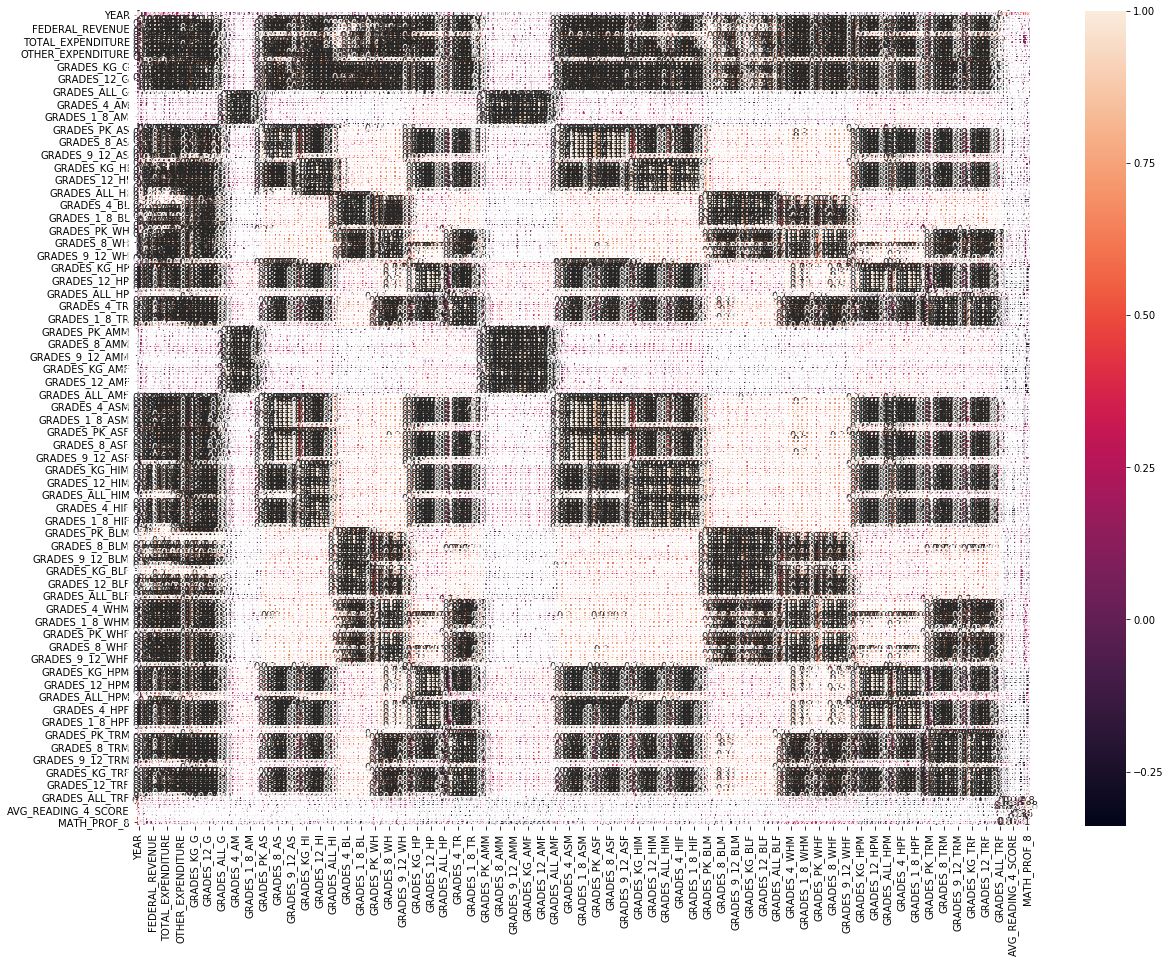

In [0]:
plt.figure(figsize=(20,15))
sns.heatmap(data = train.corr(), annot=True)

#https://github.com/mwaskom/seaborn/issues/1773
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

#***Fit a model***

In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Does it beat your baseline?

In [0]:
# Arrange data into X features matrix and y target vector

target = 'READING_PROF_8'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)

####Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Random forest model

rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

#Fit on train, score on val
rf.fit(X_train, y_train)

# Val accuracy
print('Train Accuracy', rf.score(X_train, y_train))
print('Validation Accuracy', rf.score(X_val, y_val))

Train Accuracy 0.9811912225705329
Validation Accuracy 0.7142857142857143


Dropping score columns becuase there is definitely leakage

In [0]:
drop = ['AVG_READING_8_SCORE', 'READING_PROF_8']

In [0]:
X_train = train.drop(columns = drop)
X_val = val.drop(columns=drop)
X_test = test.drop(columns=drop)

In [0]:
X_train.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'GRADES_4_TRF', 'GRADES_8_TRF', 'GRADES_12_TRF', 'GRADES_1_8_TRF',
       'GRADES_9_12_TRF', 'GRADES_ALL_TRF', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'MATH_PROF_8'],
      dtype='object', length=193)

In [0]:
# Random forest model

rf = make_pipeline(
    ce.BinaryEncoder(verbose=2),
    SimpleImputer(),
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

#Fit on train, score on val
rf.fit(X_train, y_train)

# Val accuracy
print('Train Accuracy', rf.score(X_train, y_train))
print('Validation Accuracy', rf.score(X_val, y_val))

Train Accuracy 0.9780564263322884
Validation Accuracy 0.5


In [0]:
rf.named_steps

{'binaryencoder': BinaryEncoder(cols=None, drop_invariant=False, handle_missing='value',
               handle_unknown='value', mapping=None, return_df=True, verbose=2),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                        oob_score=False, random_state=0, verbose=0,
                        warm_start=False),
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0)}

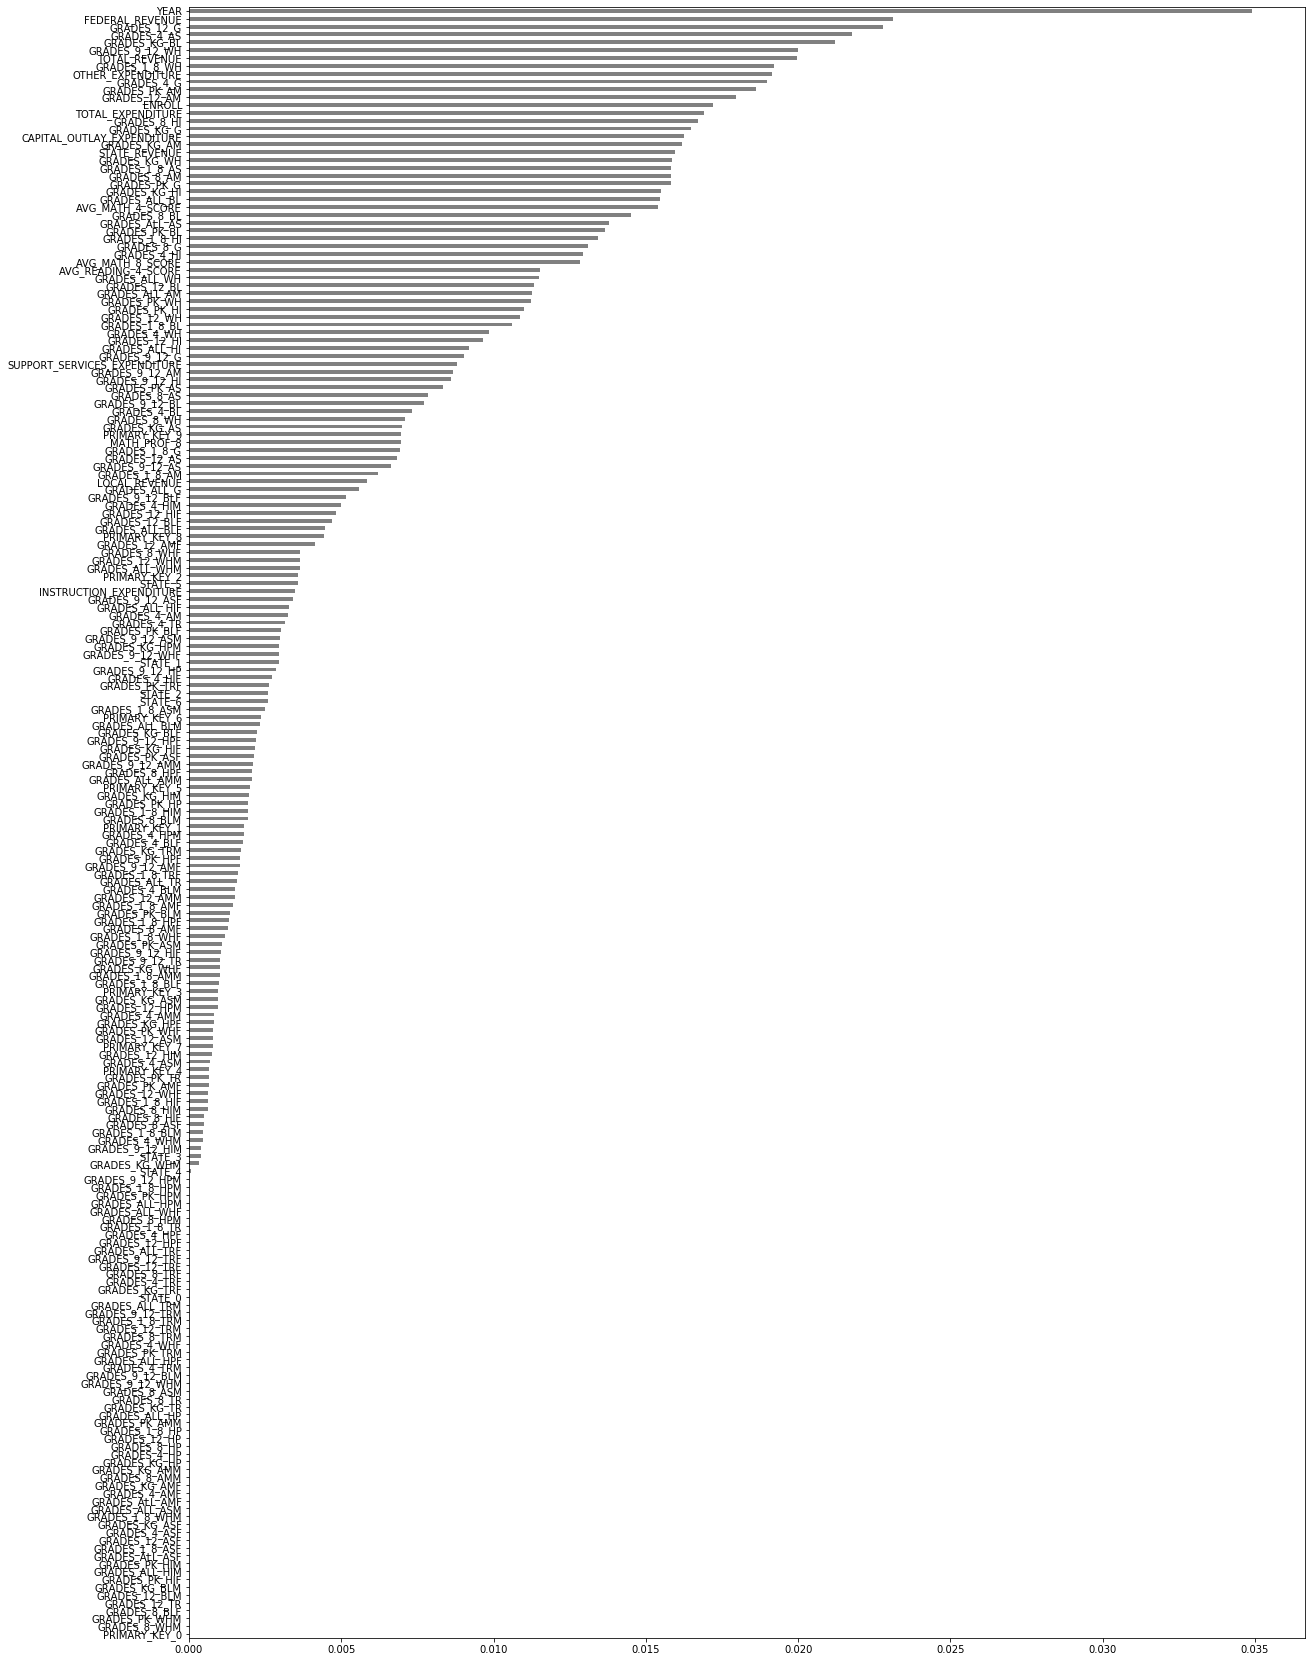

In [0]:
# Plot the feature importances
model = rf.named_steps['randomforestclassifier']
encoder = rf.named_steps['binaryencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(20,30))
importances.sort_values().plot.barh(color='grey');

#***Shapley Value***

In [0]:
!pip install shap

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.33.0-cp36-cp36m-linux_x86_64.whl size=382260 sha256=e7fa899927a131b0353a8449653517e908168b747f764d6400acb98075dc4046
  Stored in directory: /root/.cache/pip/wheels/39/0f/88/a8124d43431284e10f263ffe449e119344c6145c3a165d186c
Successfully built shap


In [0]:
import shap

In [0]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test.iloc[[0]]
row

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,GRADES_PK_AM,GRADES_KG_AM,GRADES_4_AM,GRADES_8_AM,GRADES_12_AM,GRADES_1_8_AM,GRADES_9_12_AM,GRADES_ALL_AM,GRADES_PK_AS,GRADES_KG_AS,GRADES_4_AS,GRADES_8_AS,GRADES_12_AS,GRADES_1_8_AS,GRADES_9_12_AS,GRADES_ALL_AS,GRADES_PK_HI,GRADES_KG_HI,GRADES_4_HI,...,GRADES_12_WHF,GRADES_1_8_WHF,GRADES_9_12_WHF,GRADES_ALL_WHF,GRADES_PK_HPM,GRADES_KG_HPM,GRADES_4_HPM,GRADES_8_HPM,GRADES_12_HPM,GRADES_1_8_HPM,GRADES_9_12_HPM,GRADES_ALL_HPM,GRADES_PK_HPF,GRADES_KG_HPF,GRADES_4_HPF,GRADES_8_HPF,GRADES_12_HPF,GRADES_1_8_HPF,GRADES_9_12_HPF,GRADES_ALL_HPF,GRADES_PK_TRM,GRADES_KG_TRM,GRADES_4_TRM,GRADES_8_TRM,GRADES_12_TRM,GRADES_1_8_TRM,GRADES_9_12_TRM,GRADES_ALL_TRM,GRADES_PK_TRF,GRADES_KG_TRF,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,MATH_PROF_8
1076,2013_ALABAMA,ALABAMA,2013,744548.0,7197439.0,811739.0,3898347.0,2487353.0,7487741.0,3747993.0,2317243.0,576737.0,643522.0,9415.0,59757.0,55719.0,58799.0,48965.0,458327.0,218705.0,686447.0,49.0,321.0,461.0,541.0,482.0,3773.0,2035.0,5857.0,120.0,735.0,872.0,802.0,670.0,6384.0,2856.0,9360.0,658.0,4657.0,3379.0,...,14092.0,126247.0,62154.0,190359.0,1.0,30.0,27.0,13.0,10.0,184.0,65.0,250.0,1.0,31.0,13.0,14.0,10.0,182.0,59.0,242.0,153.0,1004.0,455.0,309.0,115.0,3949.0,720.0,4822.0,129.0,970.0,429.0,307.0,125.0,3984.0,749.0,4862.0,232.861332,269.194281,218.575953,1


In [0]:
y_test.iloc[[0]]

1025    0
Name: READING_PROF_8, dtype: int64

In [0]:
row = X_test.iloc[[0]]
explainer=shap.TreeExplainer(model)
row_processed = pipeline.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=row,
    link='logit'               # For classification, this returns predicted probs
)